## *k*-Means Clustering

One of the most widely used methods of clustering is *k*-means, which also tends to be a rather basic model.

### Import libraries

Let's import some libraries necessary for our experiments

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random

### Straight Line

First, let's run k-means on a straight line to see what happens. Here, we have generated 30 data points on X axis.

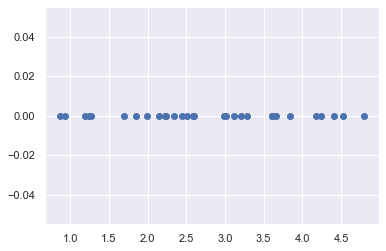

In [32]:
X1 = 5*np.random.rand(30,1)
X2 = np.zeros((30,1))
# X1.reshape(-1, 1)
# X2.reshape(-1, 1)
plt.scatter(X1,X2)
X = np.hstack((X1,X2))

Making sure the samples are on the first dimension

In [33]:
np.shape(X)

(30, 2)

Now, we will tell *k*-means to divide it into three clusters

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


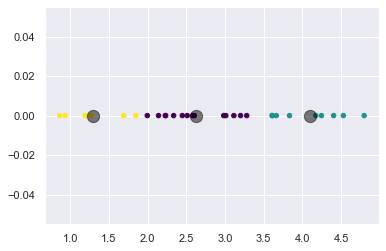

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);

We will now try out *k*-means on sklearn generated data. Let's make five random blobs for this test.

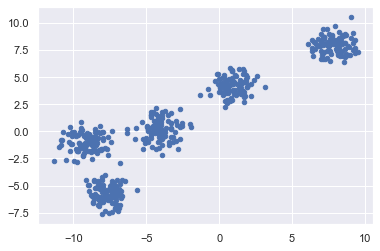

In [43]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.8, random_state=3)
plt.scatter(X[:, 0], X[:, 1], s=20);

Thus, we assign *k*=5,

In [492]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the data as usual.

2


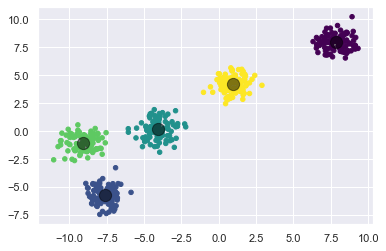

In [493]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);
iterations = kmeans.n_iter_
print(iterations)

In this case, we discovered that all the means are converged to the center of each blob in 3 iterations 

### Custom dataset

Thus, let's try out k-means with our custom dataset. Iris dataset is yet again used for this experiment.

In [44]:
df = pd.read_csv('iris_data.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

#### Extract X values for clustering

As *k*-means does not require labels, we assign all the features to X.

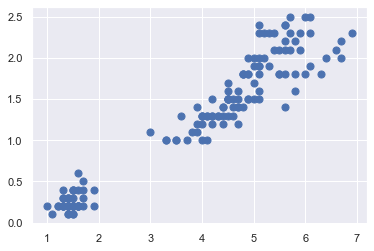

In [46]:
X1 = df.iloc[:,0:4]
X1 = X1.values
plt.scatter(X1[:, 2], X1[:, 3], s=50)

# X1 = df.iloc[:,2:4]
# X1 = X1.values
# plt.scatter(X1[:, 0], X1[:, 1], s=50)

As we have three classes in our dataset, we set k=3

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init= 10)
kmeans.fit(X1)
y1_kmeans = kmeans.predict(X1)

Let's plot our output on petal length and petal width axes-

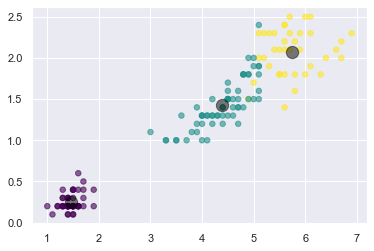

In [48]:
plt.scatter(X1[:, 2], X1[:, 3], c=y1_kmeans, s=30, cmap='viridis', alpha = 0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=150, alpha=0.5);

### Evaluation

As, *K-means* is a clustering model, it outputs clusters assigned to random integers and they may sometimes be of different order. Thus we convert our labels to integers accordingly to evaluate the model.

In [50]:
y1_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [51]:
y1 = df.loc[:,'variety']
y1 = y1.replace(['Setosa','Versicolor','Virginica'],[0,1,2])
y1 = y1.values
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_kmeans, y1)

0.8933333333333333

Let's see what our confusion matrix looks like-

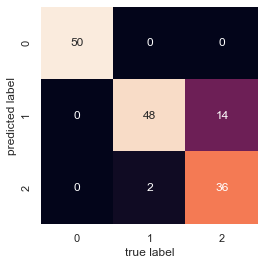

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y1, y1_kmeans)
sns.heatmap(mat.T, square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### When not to use *k*-means

*k*-means has a leniar behavior and won't be optimal for all clusters. Let's see how k-means perform on a dataset with non-linear behavior.

In [54]:
from sklearn.datasets import make_moons
X, y = make_moons(300, noise=.05, random_state=0)

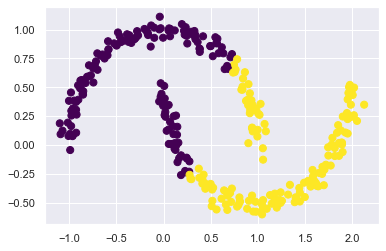

In [55]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Thus, another method called SpectralClustering is used. We won't dig deeper into this method today. If you want to find out what it does, this [article](https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/#:~:text=People%20attempt%20to%20get%20a,similar%20data%20in%20rarer%20dimensions.) is recommended.

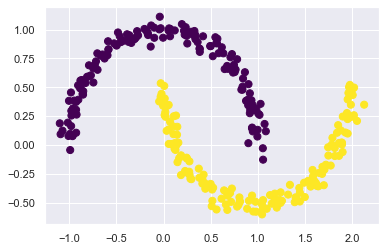

In [189]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Example : *k*-means for color compression

Color compression within images is another interesting application of *k*-means clustering. Imagine, for example, seeing an image with millions of colors. A large number of colors will not be used in most of the images, and many of the pixels in the image will have colors that are similar or even identical. In this experiment, we compressed.

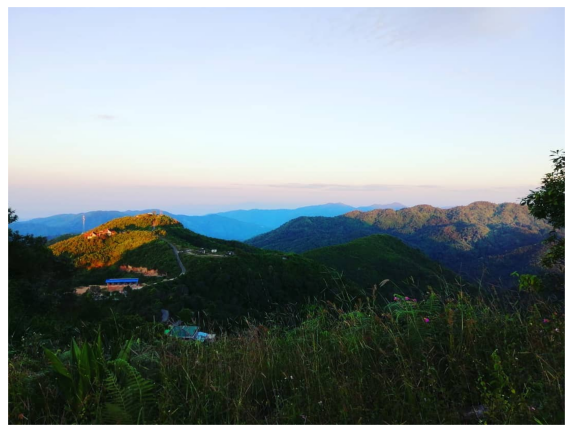

In [56]:
plt.figure(figsize=(10,10))
img = cv2.imread("images/TDG.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [57]:
img.shape

(810, 1080, 3)

Here, we stack the pixels to a single dimension so that it can fix into *k*-means

In [58]:
data = img / 255.0 # use 0...1 scale
data = data.reshape(img.shape[0] * img.shape[1], 3)
data.shape

(874800, 3)

Here, we have 874,800 data points to cluster and that could be a little too much for *k*-means. Thus, we use `MiniBatchKMeans` to fit our datapoints.

In [59]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

Let's recolor our image with these compressed colors and see the difference-

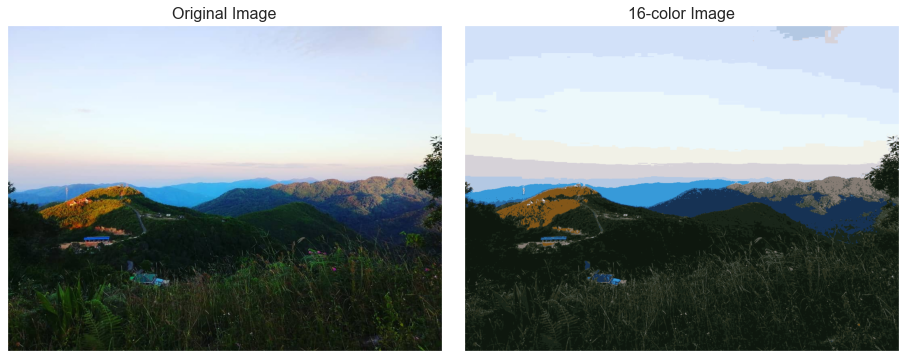

In [60]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('16-color Image', size=16);

We can see that not much detail is lost during the process. and the colors are compressed efficiently

### References 
This lecture notebook is referenced from [PythonDataScienceHandbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb). Foloow thw link if you want more intuition about this model. 